# Simulation Plot Comparison - Wildtype vs HC23

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Dataset upload and conversion to dataframe

In [2]:
a = pd.read_csv("wildtype_fva.txt", sep="\s+")
b = pd.read_csv("HC23_fva.txt", sep="\s+")
a.columns=['minA', 'maxA']
b.columns=['minB', 'maxB']
c = pd.concat([a,b],axis=1)
#FBA flux points
d = pd.read_csv("HC23_fba.txt", sep="\s+")
reactions = {'Name': ['EX_glc_e_', 'EX_glyc_e_', 'EX_etoh_e_', 'EX_succ_e_', 'EX_aces_e_', 'EX_lac_L_e_','EX_ala_L_e_', 'EX_arg_L_e_', 'EX_asn_L_e_', 'EX_cys_L_e_', 'EX_gln_L_e_', 'EX_glu_L_e_', 'EX_gly_e_', 'EX_his_L_e_', 'EX_ile_L_e_', 'EX_leu_L_e_', 'EX_lys_L_e_', 'EX_met_L_e_', 'EX_nh4_e_', 'EX_phe_L_e_', 'EX_ser_L_e_', 'EX_thr_L_e_', 'EX_trp_L_e_', 'EX_tyr_L_e_', 'EX_val_L_e_', 'EX_2mbtoh_e_', 'EX_iamoh_e_', 'EX_ibutoh_e_', 'EX_2phetoh_e_', 'EX_co2_e_']}
react = pd.DataFrame(reactions)
fba = pd.concat([react,d],axis=1)
newfba = fba.set_index('Name')
dffba = newfba.iloc[4:29]  #dataframe com valores pequenos
df1fba = newfba.iloc[[0,1,2,3,29]] #dataframe com valores grandes
df1fbaabs= df1fba.abs()

Plot comparison of the two simulations

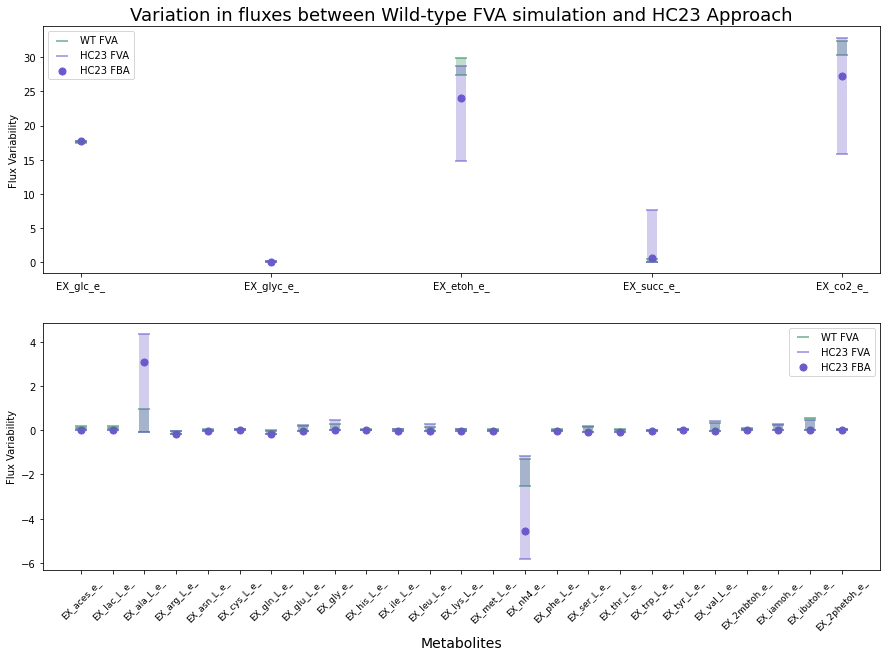

In [3]:
df = c.iloc[4:29]  #dataframe com valores pequenos
df1 = c.iloc[[0,1,2,3,29]] #dataframe com valores grandes
dfabs = df1.abs()

fig, axes = plt.subplots(2,1, figsize=(15,10))
ax1 = axes[1]
ax2 = axes[0]
axes=fig.add_axes(ax1,ax2)

ax1.set_xlabel('Metabolites',fontsize=14)
ax1.set_ylabel('Flux Variability')
ax1.scatter(df.index, df.minA, s=150, marker='_', color='seagreen', alpha=0.7, label='WT FVA')
ax1.scatter(df.index, df.maxA, s=150, marker='_', color='seagreen', alpha=0.7)
ax1.scatter(df.index, df.minB, s=150, marker='_', color='slateblue', alpha=0.7, label='HC23 FVA')
ax1.scatter(df.index, df.maxB, s=150, marker='_', color='slateblue', alpha=0.7)
ax1.vlines(df.index, ymin=df.minA, ymax=df.maxA, linewidth=10, color='seagreen', alpha=0.3)
ax1.vlines(df.index, ymin=df.minB, ymax=df.maxB, linewidth=10, color='slateblue', alpha=0.3)
ax1.tick_params(axis='x',labelsize=9,labelrotation=45)
ax1.legend()

#ax2.set_xlabel('Metabolites')
ax2.set_ylabel('Flux Variability')
ax2.set_title('Variation in fluxes between Wild-type FVA simulation and HC23 Approach', fontsize=18)
ax2.scatter(dfabs.index, dfabs.minA, s=150, marker='_', color='seagreen', alpha=0.7, label='WT FVA')
ax2.scatter(dfabs.index, dfabs.maxA, s=150, marker='_', color='seagreen', alpha=0.7)
ax2.scatter(dfabs.index, dfabs.minB, s=150, marker='_', color='slateblue', alpha=0.7, label='HC23 FVA')
ax2.scatter(dfabs.index, dfabs.maxB, s=150, marker='_', color='slateblue', alpha=0.7)
ax2.vlines(dfabs.index, ymin=dfabs.minA, ymax=dfabs.maxA,linewidth=10, color='seagreen', alpha=0.3)
ax2.vlines(dfabs.index, ymin=dfabs.minB, ymax=dfabs.maxB, linewidth=10, color='slateblue', alpha=0.3)
ax2.legend()

#FBA simultation
ax1.scatter(dffba.index, dffba.Fluxes, s=50, marker='o', color='slateblue', alpha=1, label='HC23 FBA')
ax2.scatter(df1fbaabs.index, df1fbaabs.Fluxes, s=50, marker='o', color='slateblue', alpha=1, label='HC23 FBA')
ax1.legend()
ax2.legend()